<a href="https://colab.research.google.com/github/namvux1404/STT3795/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
import graphviz

In [ ]:
'''
QUELQUES INFORMATIONS SUR LES ATTRIBUTS:
Source: https://archive.ics.uci.edu/ml/datasets/heart+disease 

# EDA: 
# https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/ 
# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55 
# https://www.kaggle.com/code/asimislam/heart-disease-uci-eda-and-ml-w-lr/notebook 

1. Âge: en années

2. Sexe: 1 = mâle, 0 = femelle

3. CP (Type du douleur thoracique): 
  -> 1. Angine typique -> ressource du sang au coeur diminuée
  -> 2. Angine atypique -> non reliée avec le coeur
  -> 3. Douleur non anginale -> spasmes oesophages (non reliée au coeur)
  -> 4. Asymptomatique ("silent angina") -> aucun symptôme de maladie

4. trestbps: Tension artérielle au repos (en mm Hg)

5. chol: sérum cholestoral en mg/dl

6. fbs: glycémie à jeun ("fasting blood sugar")
  -> 1. > 120 mg/dl
  -> 0. sinon

7. restecg: résultats électrocardiographiques au repos
  -> 0. Normal
  -> 1. Ondes anormales de ST-T
  -> 2. Hypertrophie ventriculaire gauche probable

8. thalach: Fréquence cardiaque maximale

9. exang: Angine d'effort (exercise induced angina)
  -> 1. Oui
  -> 2. Non

10. oldpeak: Dépression ST induite par l'exercice par rapport au repos

11. slope: Pente du segment ST d'effort maximal
  -> 1. Pente positive: meilleur fréquence cardiaque avec exercice (rare)
  -> 2. Plateau: coeur en santé
  -> 3. Pente négative: coeur n'étant pas en santé

12. ca: Nombre de vaisseaux principaux (0-4) colorés par fluoroscopie

13. thal: Résultat de stress au thallium
  -> 0 et 1. Normal
  -> 2: fixed defect
  -> 3. reversable defect
'''

'\nQUELQUES INFORMATIONS SUR LES ATTRIBUTS:\nSource: https://archive.ics.uci.edu/ml/datasets/heart+disease \n\n# EDA: \n# https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/ \n# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55 \n# https://www.kaggle.com/code/asimislam/heart-disease-uci-eda-and-ml-w-lr/notebook \n\n1. Âge: en années\n\n2. Sexe: 1 = mâle, 0 = femelle\n\n3. CP (Type du douleur thoracique): \n  -> 1. Angine typique -> ressource du sang au coeur diminuée\n  -> 2. Angine atypique -> non reliée avec le coeur\n  -> 3. Douleur non anginale -> spasmes oesophages (non reliée au coeur)\n  -> 4. Asymptomatique ("silent angina") -> aucun symptôme de maladie\n\n4. trestbps: Tension artérielle au repos (en mm Hg)\n\n5. chol: sérum cholestoral en mg/dl\n\n6. fbs: glycémie à jeun ("fasting blood sugar")\n  -> 1. > 120 mg/dl\n  -> 0. sinon\n\n7. restecg: résultats électro

In [ ]:
files.upload()

Saving heart.csv to heart (3).csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [ ]:
df = read_csv('heart.csv')
print(df.shape)

(303, 14)


In [ ]:
df.target.value_counts()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print('EDA: Exploratory Data Analysis')
print('Informations générales sur le jeu de données')
print('***')
df.info()

EDA: Exploratory Data Analysis
Informations générales sur le jeu de données
***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Aucune présence de données manquantes
# Pour séparer les variables catégorielles des variables numériques, float64 
# pour les variables numériques et int64 pour catégorielles.

In [ ]:
cat_att = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_att = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
df[num_att] = df[num_att].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [ ]:
# Les données semblent assez balancées
# Différence de 9% approximativement (pour 303 patients au total)
df.groupby(['target'])['target'].count()

#df.astype('object').describe().transpose()

target
0    138
1    165
Name: target, dtype: int64

In [ ]:
# Données statistiques pour les données numériques
df[num_att].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
# Données statistiques pour les données catégorielles
df[cat_att].astype('object').describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


In [ ]:
# ANALYSE UNIVARIÉE
# 1. Variables numériques
# 2. Variables catégorielles

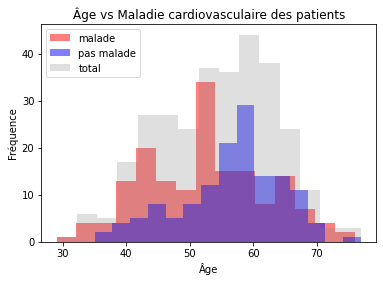

In [ ]:
# Âge
fig, ax = plt.subplots()

ax.hist(df[df['target'] == 1]['age'], bins = 15, alpha = 0.5, color = 'red',
        label = 'malade')
ax.hist(df[df['target'] == 0]['age'], bins = 15, alpha = 0.5, color = 'blue',
        label = 'pas malade')
ax.hist(df['age'], bins = 15, alpha = 0.25, color = 'grey',
        label = 'total')

ax.set_xlabel('Âge')
ax.set_ylabel('Fréquence')
plt.title('Âge vs Maladie cardiovasculaire des patients')
ax.legend()

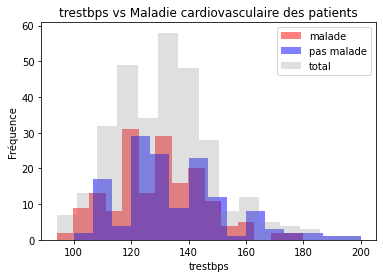

In [ ]:
# trestbps
fig, ax = plt.subplots()

ax.hist(df[df['target'] == 1]['trestbps'], bins = 15, alpha = 0.5, color = 'red',
        label = 'malade')
ax.hist(df[df['target'] == 0]['trestbps'], bins = 15, alpha = 0.5, color = 'blue',
        label = 'pas malade')
ax.hist(df['trestbps'], bins = 15, alpha = 0.25, color = 'grey',
        label = 'total')

ax.set_xlabel('trestbps')
ax.set_ylabel('Fréquence')
plt.title('trestbps vs Maladie cardiovasculaire des patients')
ax.legend()

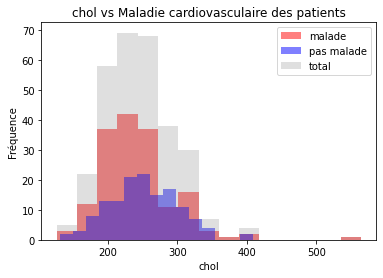

In [ ]:
# chol
fig, ax = plt.subplots()

ax.hist(df[df['target'] == 1]['chol'], bins = 15, alpha = 0.5, color = 'red',
        label = 'malade')
ax.hist(df[df['target'] == 0]['chol'], bins = 15, alpha = 0.5, color = 'blue',
        label = 'pas malade')
ax.hist(df['chol'], bins = 15, alpha = 0.25, color = 'grey',
        label = 'total')

ax.set_xlabel('chol')
ax.set_ylabel('Fréquence')
plt.title('chol vs Maladie cardiovasculaire des patients')
ax.legend()

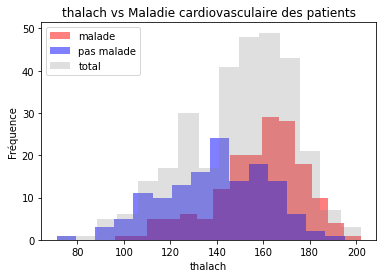

In [ ]:
# thalach
fig, ax = plt.subplots()

ax.hist(df[df['target'] == 1]['thalach'], bins = 15, alpha = 0.5, color = 'red',
        label = 'malade')
ax.hist(df[df['target'] == 0]['thalach'], bins = 15, alpha = 0.5, color = 'blue',
        label = 'pas malade')
ax.hist(df['thalach'], bins = 15, alpha = 0.25, color = 'grey',
        label = 'total')

ax.set_xlabel('thalach')
ax.set_ylabel('Fréquence')
plt.title('thalach vs Maladie cardiovasculaire des patients')
ax.legend()

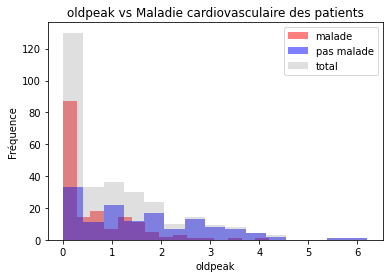

In [ ]:
# oldpeak
fig, ax = plt.subplots()

ax.hist(df[df['target'] == 1]['oldpeak'], bins = 15, alpha = 0.5, color = 'red',
        label = 'malade')
ax.hist(df[df['target'] == 0]['oldpeak'], bins = 15, alpha = 0.5, color = 'blue',
        label = 'pas malade')
ax.hist(df['oldpeak'], bins = 15, alpha = 0.25, color = 'grey',
        label = 'total')

ax.set_xlabel('oldpeak')
ax.set_ylabel('Fréquence')
plt.title('oldpeak vs Maladie cardiovasculaire des patients')
ax.legend()

sex  target
1    0         114
     1          93
0    1          72
     0          24
dtype: int64


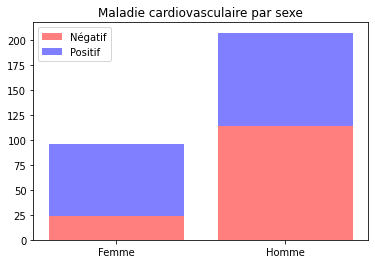

In [ ]:
count_sex = df[['sex', 'target']].value_counts()

disease = (count_sex[0][1], count_sex[1][1])
nodisease = (count_sex[0][0], count_sex[1][0])
print(count_sex)

labels = ['Femme', 'Homme']

plt.title('Maladie cardiovasculaire par sexe')
plt.bar(labels, nodisease, color = 'red', alpha = 0.5)
plt.bar(labels, disease, bottom = nodisease, color = 'blue', alpha = 0.5)
plt.legend(labels = ["Négatif","Positif"])

plt.show()

cp  target
0   0         104
2   1          69
1   1          41
0   1          39
2   0          18
3   1          16
1   0           9
3   0           7
dtype: int64


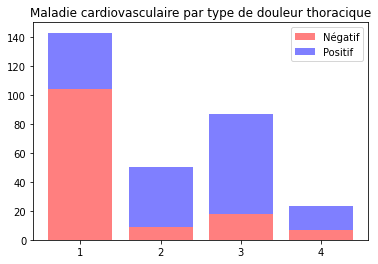

In [ ]:
#2. CP
# Indice 1: CP
# Indice 2: présence ou non de maladie cardiovasculaire

count_cp = df[['cp', 'target']].value_counts()
print(count_cp)

disease = (count_cp[0][1], count_cp[1][1], count_cp[2][1], count_cp[3][1])
nodisease = (count_cp[0][0], count_cp[1][0], count_cp[2][0], count_cp[3][0])
labels = ['1', '2', '3', '4']

plt.title('Maladie cardiovasculaire par type de douleur thoracique')
plt.bar(labels, nodisease, color = 'red', alpha = 0.5)
plt.bar(labels, disease, bottom = nodisease, color = 'blue', alpha = 0.5)
plt.legend(labels = ["Négatif","Positif"])

plt.show()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
dtype: int64


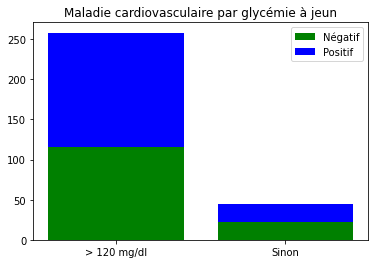

In [ ]:
'''
6. fbs: glycémie à jeun ("fasting blood sugar")
  -> 1. > 120 mg/dl
  -> 0. sinon
'''
#3. fbs
# Indice 1: fbs
# Indice 2: présence ou non de maladie cardiovasculaire

count = df[['fbs', 'target']].value_counts()
print(count)

disease = (count[0][1], count[1][1])
nodisease = (count[0][0], count[1][0])
labels = ['> 120 mg/dl', 'Sinon']

plt.title('Maladie cardiovasculaire par glycémie à jeun')
plt.bar(labels, nodisease, color = 'green')
plt.bar(labels, disease, bottom = nodisease, color = 'blue')
plt.legend(labels = ["Négatif","Positif"])

plt.show()

restecg  target
1        1         96
0        0         79
         1         68
1        0         56
2        0          3
         1          1
dtype: int64


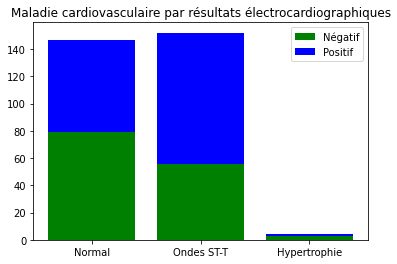

In [ ]:
'''
7. restecg: résultats électrocardiographiques au repos
  -> 0. Normal
  -> 1. Ondes anormales de ST-T
  -> 2. Hypertrophie ventriculaire gauche probable
'''
count = df[['restecg', 'target']].value_counts()
print(count)

disease = (count[0][1], count[1][1], count[2][1])
nodisease = (count[0][0], count[1][0], count[2][0])
labels = ['Normal','Ondes ST-T','Hypertrophie']

plt.title('Maladie cardiovasculaire par résultats électrocardiographiques')
plt.bar(labels, nodisease, color = 'green')
plt.bar(labels, disease, bottom = nodisease, color = 'blue')
plt.legend(labels = ["Négatif","Positif"])

plt.show()

exang  target
0      1         142
1      0          76
0      0          62
1      1          23
dtype: int64


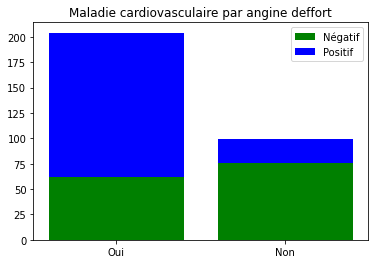

In [ ]:
'''
9. exang: Angine d'effort (exercise induced angina)
  -> 1. Oui
  -> 2. Non
'''
count = df[['exang', 'target']].value_counts()
print(count)

disease = (count[0][1], count[1][1])
nodisease = (count[0][0], count[1][0])
labels = ['Oui','Non']

plt.title('Maladie cardiovasculaire par angine d''effort')
plt.bar(labels, nodisease, color = 'green')
plt.bar(labels, disease, bottom = nodisease, color = 'blue')
plt.legend(labels = ["Négatif","Positif"])

plt.show()

slope  target
2      1         107
1      0          91
       1          49
2      0          35
0      0          12
       1           9
dtype: int64


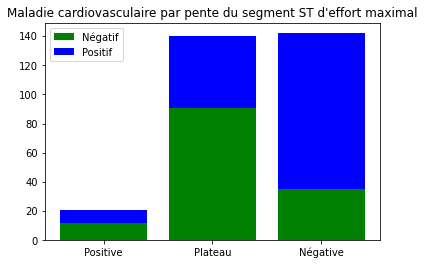

In [ ]:
'''
11. slope: Pente du segment ST d'effort maximal
  -> 1. Pente positive: meilleur fréquence cardiaque avec exercice (rare)
  -> 2. Plateau: coeur en santé
  -> 3. Pente négative: coeur n'étant pas en santé
'''
count = df[['slope', 'target']].value_counts()
print(count)

disease = (count[0][1], count[1][1], count[2][1])
nodisease = (count[0][0], count[1][0], count[2][0])
labels = ['Positive', 'Plateau', 'Négative']

plt.title('Maladie cardiovasculaire par pente du segment ST d\'effort maximal')
plt.bar(labels, nodisease, color = 'green')
plt.bar(labels, disease, bottom = nodisease, color = 'blue')
plt.legend(labels = ["Négatif","Positif"])

plt.show()

thal  target
2     1         130
3     0          89
2     0          36
3     1          28
1     0          12
      1           6
0     0           1
      1           1
dtype: int64


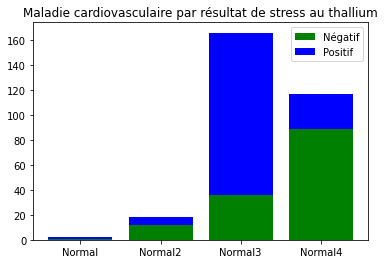

In [ ]:
'''
13. thal: Résultat de stress au thallium
  -> 1,3: normal
  -> 6: used to be defect, but ok now
  -> 7: no proper blood movement when exercising
'''
count = df[['thal', 'target']].value_counts()
print(count)

disease = (count[0][1], count[1][1], count[2][1], count[3][1])
nodisease = (count[0][0], count[1][0], count[2][0], count[3][0])
labels = ['Normal', 'Normal2', 'Normal3', 'Normal4']

plt.title('Maladie cardiovasculaire par résultat de stress au thallium')
plt.bar(labels, nodisease, color = 'green')
plt.bar(labels, disease, bottom = nodisease, color = 'blue')
plt.legend(labels = ["Négatif","Positif"])

plt.show()

In [ ]:
# ANALYSE MULTIVARIÉE
# 1. Graphes par paires
# 2. Matrice de corrélation

In [ ]:
# Pairs plot
X = df.drop(['target'], axis = 1)
#sns.pairplot(X, diag_kind = 'kde')

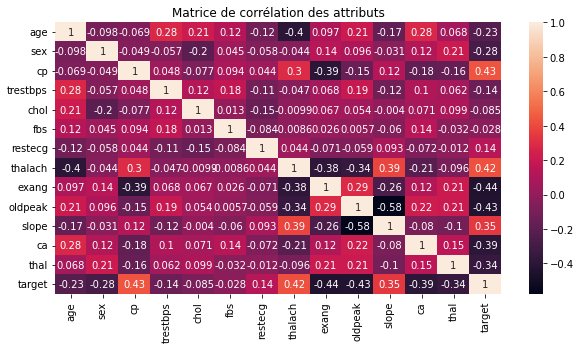

In [ ]:
# Matrice corrélation
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.title('Matrice de corrélation des attributs')
plt.show()

In [ ]:
# Prétraitement avec One-Hot Encoding
X = df
X = df.drop(['target'], axis = 1)
Y = df['target']

print(Y.shape, X.shape)

(303,) (303, 13)


In [ ]:
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

#function pour ajouter les colonnes apres onehot coding
def add_columns(df, le, x, name, colnames):
    col_names = colnames
    '''
    for feature in range(x.shape[1]):
        col_names.append(le.inverse_transform([feature])[0])
    '''
    df[col_names] = pd.DataFrame(x, index=df.index)
    del df[name]
    return col_names

In [ ]:
def onehotCoding(arrayFeature):
  le.fit(arrayFeature)
  le.transform(arrayFeature) 
  enc = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)
  enc.fit(arrayFeature.values.reshape(-1,1))
  result = enc.transform(arrayFeature.values.reshape(-1,1))
  return result

In [ ]:
# Pour les attributs catégoriels
sex = onehotCoding(X['sex'])
cp = onehotCoding(X['cp'])
fbs = onehotCoding(X['fbs'])
restecg = onehotCoding(X['restecg'])
exang = onehotCoding(X['exang'])
slope = onehotCoding(X['slope'])
ca = onehotCoding(X['ca'])
thal = onehotCoding(X['thal'])

In [ ]:
col_names_sex = add_columns(X, le, sex, 'sex', ['sex0', 'sex1'])
col_names_cp = add_columns(X, le, cp, 'cp',['cp0','cp1','cp2','cp3'])
col_names_fbs = add_columns(X, le, fbs, 'fbs', ['fbs0', 'fbs1'])
col_names_restecg = add_columns(X, le, restecg, 'restecg',['restecg0','restecg1','restecg2'])
col_names_exang = add_columns(X, le, exang, 'exang', ['exang0', 'exang1'])
col_names_slope = add_columns(X, le, slope, 'slope',['slope0','slope1','slope2'])
col_names_ca = add_columns(X, le, ca, 'ca',['ca0','ca1','ca2','ca3','ca4'])
col_names_thal = add_columns(X, le, thal, 'thal',['thal0','thal1','thal2','thal3'])
X

,age,trestbps,chol,thalach,oldpeak,sex0,sex1,cp0,cp1,cp2,...,slope2,ca0,ca1,ca2,ca3,ca4,thal0,thal1,thal2,thal3
0,63.0,145.0,233.0,150.0,2.3,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37.0,130.0,250.0,187.0,3.5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,130.0,204.0,172.0,1.4,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.0,120.0,236.0,178.0,0.8,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57.0,120.0,354.0,163.0,0.6,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,140.0,241.0,123.0,0.2,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,45.0,110.0,264.0,132.0,1.2,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,68.0,144.0,193.0,141.0,3.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,57.0,130.0,131.0,115.0,1.2,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X.shape

(303, 30)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Random Forest avec donnees brutes**

In [ ]:
#X = df[X_col_names_reels + col_names_cp]
#ici dataset est X_copie
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('X_train, X_val, X_test, Y_train, Y_val, Y_test', X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_train

X_train, X_val, X_test, Y_train, Y_val, Y_test (169, 30) (91, 30) (169,) (91,)


array([[0.52083333, 0.24528302, 0.14155251, ..., 0.        , 0.        ,
        1.        ],
       [0.83333333, 0.62264151, 0.24657534, ..., 0.        , 1.        ,
        0.        ],
       [0.60416667, 0.49056604, 0.21004566, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.35416667, 0.24528302, 0.28082192, ..., 0.        , 0.        ,
        1.        ],
       [0.625     , 0.79245283, 0.32876712, ..., 0.        , 0.        ,
        1.        ],
       [0.625     , 0.37735849, 0.17808219, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#arbre decision
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
decision_tree = decision_tree.fit(X_train, y_train)
print('Accuracy = ',decision_tree.score(X_test, y_test))

Accuracy =  0.7472527472527473


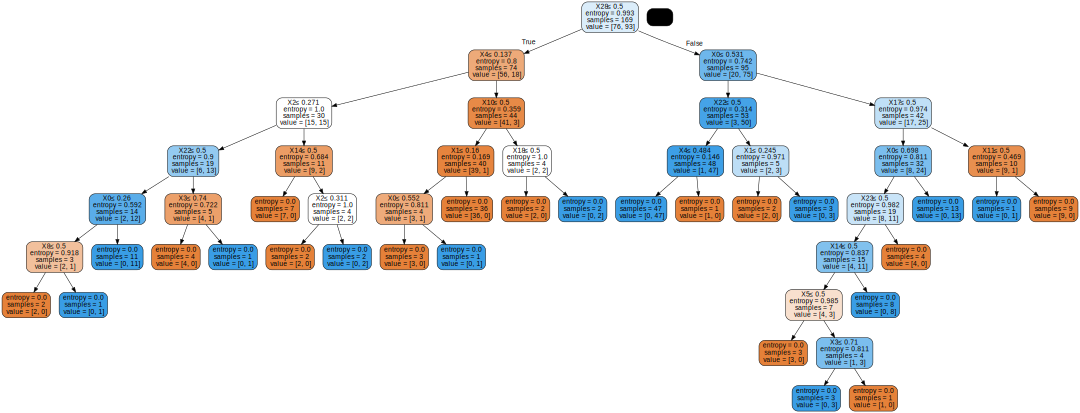

In [ ]:
import pydotplus
from graphviz import Source

dot_data = tree.export_graphviz(decision_tree, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True) 
'''
export_graphviz(
        decision_tree,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=X_copie.columns,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

'''
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"15,15!"')
graph = graphviz.Source(pydot_graph.to_string())
graph

In [ ]:
#foret aleatoire
from sklearn.ensemble import RandomForestClassifier

foret_aleatoire = RandomForestClassifier(n_estimators=50, max_depth=11)
foret_aleatoire.fit(X_train, y_train)
print('Accuracy val = ',foret_aleatoire.score(X_val, y_val))
print('Accuracy test = ',foret_aleatoire.score(X_test, y_test))

Accuracy val =  0.7906976744186046
Accuracy test =  0.7692307692307693


**Random Forest avec ISOMAP**

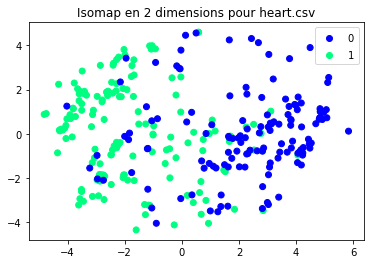

In [ ]:
# Isomap
from sklearn.manifold import Isomap

components = 2
neighbors = 5

embedding = Isomap(n_components = components, n_neighbors = neighbors) 
X_reduced = embedding.fit_transform(X)

if components == 2:
  plt.title('Isomap en 2 dimensions pour heart.csv')
  scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c = Y, cmap = 'winter')
  plt.legend(*scatter.legend_elements())
  plt.show()

if components == 3:
  ax = plt.axes(projection = '3d')
  plt.title('Isomap en 3 dimensions pour heart.csv')
  ax.scatter3D(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c = Y, cmap = 'winter')
  ax.legend(*scatter.legend_elements())
  plt.show()

In [ ]:
#X = df[X_col_names_reels + col_names_cp]
#ici dataset est X_copie
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.3, stratify=Y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('X_train, X_val, X_test, Y_train, Y_val, Y_test', X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#X_train

X_train, X_val, X_test, Y_train, Y_val, Y_test (169, 2) (91, 2) (169,) (91,)


In [ ]:
#arbre decision pour isomap
decision_tree_isomap = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
decision_tree_isomap = decision_tree_isomap.fit(X_train, y_train)
print('Accuracy = ',decision_tree_isomap.score(X_test, y_test))

Accuracy =  0.7802197802197802


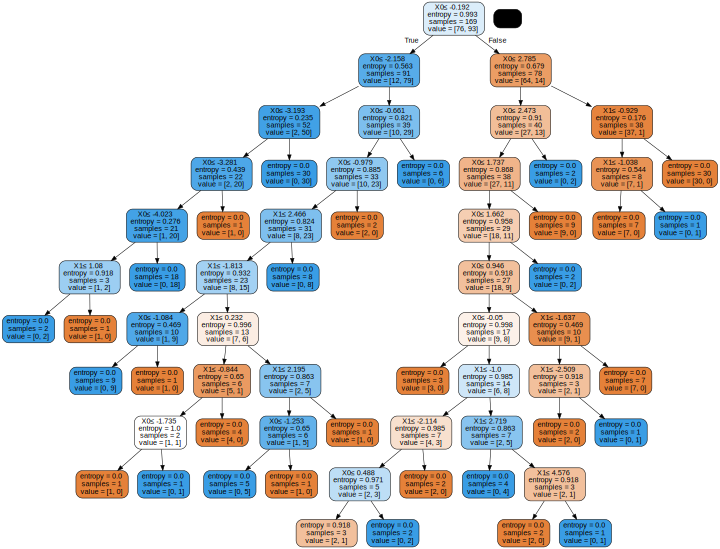

In [ ]:
import pydotplus
from graphviz import Source

dot_data = tree.export_graphviz(decision_tree_isomap, out_file=None,
                            
                         filled=True, rounded=True,  
                         special_characters=True) 
'''
export_graphviz(
        decision_tree,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=X_copie.columns,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

'''
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
graph = graphviz.Source(pydot_graph.to_string())
graph

In [ ]:
list(zip(X_reduced, decision_tree.feature_importances_))

[(array([ 0.74773199, -0.26352372]), 0.17338510683086666),
 (array([-2.86150142, -1.3615978 ]), 0.049808418911361826),
 (array([-3.50234387,  1.3541968 ]), 0.055914412057254226),
 (array([-2.96850633, -2.09449979]), 0.04085941017222321),
 (array([-2.1842191,  1.6769632]), 0.12184396823894603),
 (array([ 0.73308699, -0.76676219]), 0.021765554741862227),
 (array([-2.21038688,  3.4702259 ]), 0.0),
 (array([-1.11587359, -3.25358867]), 0.0),
 (array([-1.30375442, -3.20635867]), 0.016421172124587543),
 (array([-2.8802034, -1.8450964]), 0.0),
 (array([-2.05584634, -1.99270084]), 0.030125791555628854),
 (array([-3.72397007,  0.77804172]), 0.02795561474635383),
 (array([-2.86172411, -1.95694644]), 0.0),
 (array([1.06275519, 0.61924467]), 0.0),
 (array([-2.5965572 ,  1.72872088]), 0.05470432894650948),
 (array([-2.42026254,  1.83673039]), 0.0),
 (array([-3.89264902,  0.68533087]), 0.0),
 (array([-3.76545088,  2.29521999]), 0.0610570834673236),
 (array([-2.01230342, -1.86574576]), 0.0238429658005

In [ ]:
#foret aleatoire pour isomap
from sklearn.ensemble import RandomForestClassifier

foret_aleatoire_isomap = RandomForestClassifier(n_estimators=50, max_depth=11)
foret_aleatoire_isomap.fit(X_train, y_train)
print('Accuracy val = ',foret_aleatoire_isomap.score(X_val, y_val))
print('Accuracy test = ',foret_aleatoire_isomap.score(X_test, y_test))

Accuracy val =  0.813953488372093
Accuracy test =  0.8351648351648352


In [ ]:
param_grid = [{'n_estimators': [10,30,50,100,200], 'max_depth': [10,15,20,30,50]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.3, stratify=Y, random_state=0)
rf = RandomForestClassifier()

clf = GridSearchCV(rf, param_grid, cv=5)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15, 20, 30, 50],
                          'n_estimators': [10, 30, 50, 100, 200]}])

In [ ]:
print(clf.best_params_)

{'max_depth': 30, 'n_estimators': 50}


In [ ]:
accuracy = np.array(clf.cv_results_['mean_test_score']).reshape(
    len(param_grid[0]['n_estimators']), len(param_grid[0]['max_depth']))
accuracy

array([[0.82059801, 0.80598007, 0.78726467, 0.80143965, 0.81539313],
       [0.81063123, 0.81096346, 0.79667774, 0.80143965, 0.82491694],
       [0.81040975, 0.81085271, 0.80155039, 0.81085271, 0.8248062 ],
       [0.81085271, 0.80598007, 0.82502769, 0.81550388, 0.80620155],
       [0.80598007, 0.81074197, 0.80143965, 0.82502769, 0.81550388]])

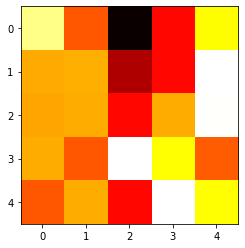

In [ ]:
plt.imshow(accuracy, cmap='hot')

In [ ]:
#test avec test set
clf.score(X_test, y_test)

0.7912087912087912

**Random Forest avec PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import KMeans

X_pca = PCA(n_components=2).fit_transform(X)
print(X.shape)
print(X_pca.shape)

(303, 30)
(303, 2)


In [ ]:
#X = df[X_col_names_reels + col_names_cp]
#ici dataset est X_copie
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, stratify=Y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('X_train, X_val, X_test, Y_train, Y_val, Y_test', X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#X_train

X_train, X_val, X_test, Y_train, Y_val, Y_test (169, 2) (91, 2) (169,) (91,)


In [ ]:
#arbre decision avec PCA
decision_tree_pca = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
decision_tree_pca = decision_tree_pca.fit(X_train, y_train)
print('Accuracy = ',decision_tree_pca.score(X_test, y_test))

Accuracy =  0.7802197802197802


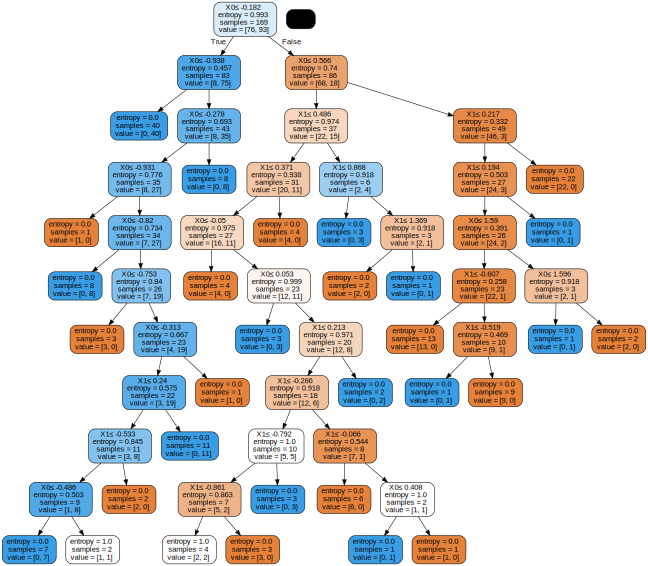

In [ ]:
import pydotplus
from graphviz import Source

dot_data = tree.export_graphviz(decision_tree_pca, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True) 
'''
export_graphviz(
        decision_tree,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=X_copie.columns,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

'''
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"9,9!"')
graph = graphviz.Source(pydot_graph.to_string())
graph

In [ ]:
#foret aleatoire avec PCA
from sklearn.ensemble import RandomForestClassifier

foret_aleatoire_pca = RandomForestClassifier(n_estimators=50, max_depth=11)
foret_aleatoire_pca.fit(X_train, y_train)
print('Accuracy val = ',foret_aleatoire_pca.score(X_val, y_val))
print('Accuracy test = ',foret_aleatoire_pca.score(X_test, y_test))

Accuracy val =  0.7674418604651163
Accuracy test =  0.8241758241758241
